# Wine Analysis

In [26]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from statistics import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [13]:
# import data
red = pd.read_csv("winequality-red.csv", delimiter=";")
white = pd.read_csv("winequality-white.csv", delimiter=";")

# Red wine

In [14]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


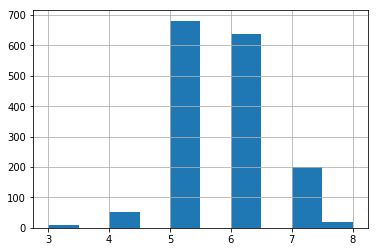

In [15]:
# data visualization
red['quality'].hist()

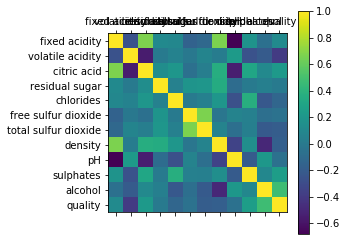

In [16]:
plt.matshow(red.corr())
plt.xticks(range(len(red.columns)), red.columns)
plt.yticks(range(len(red.columns)), red.columns)
plt.colorbar()
plt.show()

In [17]:
red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## feature selection
'alcohol' and 'volatile acidity' are most correlated with quality.

# Data Cleaning

In [18]:
# categorize the quality attribute
def getQuality(quality):
    if quality>6: # the median quality is 6, so above 6 is good (1) quality and below is bad (0)
        return 1 # good
    else:
        return 0 # bad
red['quality'] = red['quality'].apply(getQuality)

# Train and test dataset
The original dataset is seperated into the train and test dataset. The train set will then be seperated into smaller train and test set which are used for training the model. The best model will be used to predict the test dataset. The purpose of this is to ensure that the model actually works. 

In [19]:
# train and test set
red_train, red_test = train_test_split(red, test_size=0.2)

# spliting the X and y of training set
red_train_X = red_train.drop('quality', axis=1)
red_train_y = red_train['quality']

# split the X and y of testing set
red_test_X = red_test.drop('quality', axis=1)
red_test_y = red_test['quality']

# Oversampling - SMOTE
The SMOTE method generates synthetic data points of the minority class which have close approximity as the actual data points. I would then use the oversampled data for training the models. 

In [20]:
# SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(red_train_y)) # distribution of classes before SMOTE
sm = SMOTE(random_state=37)
red_train_X_res, red_train_y_res = sm.fit_resample(red_train_X, red_train_y)
print('Resampled dataset shape %s' % Counter(red_train_y_res)) # distribution of classes after SMOTE

# change the datasets into dataframes. 
red_train_X_res = pd.DataFrame(red_train_X_res)
red_train_y_res = pd.DataFrame(red_train_y_res)
red_train_res = pd.concat([red_train_X_res, red_train_y_res], axis=1, sort=False)

Original dataset shape Counter({0: 1112, 1: 167})
Resampled dataset shape Counter({1: 1112, 0: 1112})


# Training and testing the model
I am using KFold to train the model. The testing of the model is done on unseen data.

In [30]:
# get classification report
def get_report(y_true, y_pred):
    return classification_report(y_true, y_pred)

# train and test the model using KFold
def test(model, df, X, y, num_splits = 3):
    # model: model for training
    # df: training dataset
    # X: exploratory features
    # y: explanatory features (target)
    # num_splits: number of splits for the KFold. Default is 3. 
    
    scores_of_model = [] # contains the score of each fold
    kf = KFold(n_splits=num_splits) # KFold
    
    for train_index, test_index in kf.split(df.index):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train) # train the model
        score = model.score(X_test, y_test)
        scores_of_model.append(score) # score of testing
        print("Score of the model", score) # get score of the model
        
        ypred = model.predict(X_test) # prediction
        print(get_report(y_test, ypred)) # get classification report
        
        # find locations of the wrong predictions to find similarities of these data
        #ag = ~(ypred==y_test) # location of the wrong predictions
        #wrong_ag.extend(test_index[ag]) # record of wrong predictions
        
    print("Mean score of the model ", mean(scores_of_model)) # mean score of the model

In [31]:
# train the models
rf = RandomForestClassifier(n_estimators=50)
red_pred = test(rf, red_train_res, red_train_X_res, red_train_y_res)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of the model 0.8517520215633423
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       642
           1       0.48      0.97      0.64       100

   micro avg       0.85      0.85      0.85       742
   macro avg       0.73      0.90      0.77       742
weighted avg       0.92      0.85      0.87       742



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of the model 0.9122807017543859
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       470
           1       0.82      0.97      0.89       271

   micro avg       0.91      0.91      0.91       741
   macro avg       0.90      0.93      0.91       741
weighted avg       0.92      0.91      0.91       741



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of the model 0.8623481781376519
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93       741

   micro avg       0.86      0.86      0.86       741
   macro avg       0.50      0.43      0.46       741
weighted avg       1.00      0.86      0.93       741

Mean score of the model  0.8754603004851267


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
# test the model using unseen data
ypred = rf.predict(red_test_X) # prediction
print(get_report(red_test_y, ypred)) # get classification report
print("Score of the model for testing:", rf.score(red_test_X, red_test_y))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       270
           1       0.72      0.58      0.64        50

   micro avg       0.90      0.90      0.90       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.89      0.90      0.90       320

Score of the model for testing: 0.9
